# Joanna differntial expression

We have proteomic differential expression between Normal (adj) and Tumor on a set of patients. 
How does that compare to the scRNAseq

1. get the same set of samples
2. get their DE genes (between adjacent normal and Tumor, since we dont have true normal)

In [1]:
from tidyverse.dummy import *
import scanpy as sc
from sctools.transforms import groupby_rows
import sys
sys.path.append('/home/mstrasse/CRUK-code/')
from crukiopy_release.datatools import read_metadata
from crukiopy_release.celltype_mappings import annotate_coarse_celltype, annotate_epi_stroma_immune
from crukiopy_release.colormaps import color_dict_coarse_celltype, celltype_order_coarse_celltype, color_dict_CellLabels, color_dict_diagnosis

Importing tidyverse


save the plots here

In [2]:
plotfolder = '/tmp/ECM/'
import os 
if not os.path.exists(plotfolder):
    os.mkdir(plotfolder)

# Load the 98 significantly changed genes in proteomics
from the DE table

In [4]:
genes_NE_vs_T = [
    'AHNAK', 'DSP', 'COL6A3', 'KRT6C', 'KRT5', 'DES', 'KRT4', 'FLNC', 'FGB', 'KRT13', 'COL14A1',
    'PLEC', 'FGG', 'MYH11', 'COPG1', 'COL7A1', 'COPA', 'PPL', 'LAMA4', 'KRT14', 'MYO1C', 'SYNM', 'FGA', 
    'MYH9', 'EEF1A1', 'NID1', 'ACTN4', 'COL6A1', 'KRT16', 'EVPL', 'MDH2', 'FBN1', 'HSP90B1', 'HSPB1', 
    'HSP90AA1', 'CAND1', 'COPB1', 'LAMB2', 'LAMC1', 'LRPPRC', 'KRT78', 'PGM5', 'EPX', 'SORBS1', 'MPO', 
    'HNRNPK', 'KRT6A', 'COL6A2', 'FLNA', 'AOC3', 'DDX17', 'DNM2', 'HSPD1', 'VWA1', 'CPA3', 'TXNDC5', 'AGR2', 
    'VIM', 'ANXA1', 'POSTN', 'EEF2', 'CMA1', 'PRELP', 'TUFM', 'GFPT1', 'CFL1', 'FAM83H', 'LAMA5', 'CLTC', 'PFN1', 
    'DHX9', 'NES', 'HSP90AB1', 'DMD', 'JUP', 'PRKDC', 'S100A16', 'DSC2', 'KRT17', 'PRG2', 'MAOB', 'ANXA4', 'SPTBN2', 
    'IGKC', 'CNN1', 'PRG3', 'KRT8', 'P4HB', 'KRT15', 'APOE', 'IGHA2', 'ARCN1', 'SPTB', 'APCS', 'ALDH18A1', 'KHSRP', 'KRT9', 'SYNPO2', 
]

fc = [
    -3.93, -3.02, -2.13, -6.25, -7.68, -5.23, -6.58, -2.86, 4.58, -8.08, -2.39, -1.22, 5.71, -1.08, 2.06, -4.00, 1.97, -5.89, -1.32, -5.42, -2.19, -2.28, 5.69, 1.89, 2.13, -2.10, 0.67, -1.78, -5.12, -3.36, 2.25, 1.41, 3.01, -2.94, 2.31, 1.64, 0.79, -1.75, -1.08, 3.76, -4.84, -1.37, 1.92, -2.50, 2.61, 2.77, -5.58, -1.81, -1.63, -2.93, 3.08, 1.55, 2.07, -1.71, -4.39, 2.05, 1.93, -1.31, -2.86, 0.78, 1.76, -3.26, -2.70, 2.07, 3.42, 2.33, -4.03, -0.98, 1.00, 2.83, 0.73, -1.78, 1.67, -2.28, -2.99, 0.94, -3.55, -2.61, -4.96, 5.31, -1.77, 1.88, -1.02, 2.31, -3.05, 3.43, 1.55, 0.91, -7.20, -0.60, 3.29, -1.43, -3.28, -0.98, 2.76, 0.77, 1.89, -2.17, 
]
qval = [
    1.85E-75, 1.06E-51, 4.03E-47, 2.94E-42, 2.78E-32, 4.23E-28, 4.32E-27, 1.16E-26, 5.89E-26, 6.28E-25, 2.18E-23, 1.10E-21, 5.66E-21, 2.70E-19, 1.85E-18, 2.41E-18, 4.90E-16, 2.38E-14, 1.27E-13, 2.67E-13, 2.76E-13, 1.92E-11, 2.22E-11, 8.64E-11, 1.91E-10, 2.44E-10, 2.48E-10, 2.51E-10, 1.50E-09, 1.54E-09, 3.98E-09, 8.40E-09, 1.25E-08, 1.60E-08, 2.63E-08, 3.33E-08, 3.39E-08, 4.35E-08, 7.37E-08, 8.88E-08, 1.07E-07, 1.25E-07, 1.68E-07, 1.77E-07, 2.02E-07, 2.19E-07, 3.90E-07, 5.85E-07, 7.01E-07, 7.01E-07, 1.26E-06, 2.87E-06, 3.28E-06, 3.30E-06, 3.53E-06, 4.03E-06, 4.13E-06, 4.44E-06, 5.27E-06, 5.75E-06, 7.75E-06, 7.75E-06, 8.58E-06, 9.66E-06, 1.17E-05, 1.17E-05, 2.52E-05, 2.64E-05, 2.84E-05, 2.95E-05, 3.93E-05, 4.05E-05, 5.33E-05, 6.02E-05, 6.12E-05, 6.30E-05, 8.39E-05, 9.05E-05, 9.63E-05, 1.39E-04, 1.44E-04, 2.18E-04, 2.24E-04, 2.58E-04, 3.25E-04, 3.30E-04, 4.05E-04, 4.25E-04, 5.22E-04, 5.67E-04, 7.71E-04, 7.82E-04, 7.98E-04, 8.11E-04, 8.12E-04, 8.58E-04, 9.42E-04, 9.86E-04,]

df_NE_vs_T = pd.DataFrame({'gene': genes_NE_vs_T, 'log2fc': fc, 'qvalue': qval})
df_NE_vs_T.head()

,gene,log2fc,qvalue
0,AHNAK,-3.93,1.850000e-75
1,DSP,-3.02,1.060000e-51
2,COL6A3,-2.13,4.030000e-47
3,KRT6C,-6.25,2.940000e-42
4,KRT5,-7.68,2.780000e-32


In [5]:
ECM_patients = ['E07', 'E14','E20','E21', 'E24','E26']
ECM_diagnosis =['NE', 'T']

### Load scRNAseq
from `gsutil -m cp gs://cruk-adata-for-cellbrowser/Aug2022_adata/Atlas/Eso_Atlas.h5ad .`

In [7]:
adata_10x = sc.read_h5ad('/home/mstrasse/TB4/Aug2022_adata/Atlas/Eso_Atlas.h5ad')

In [8]:
# fixing some diagnosis
from crukiopy_release.datatools import fix_diagnosis, diagnosis_fix_dict
adata_10x = fix_diagnosis(adata_10x)

df_meta = read_metadata()
df_meta = df_meta[df_meta.samplename.isin(adata_10x.obs.samplename.unique())].set_index('samplename').sort_values('diagnosis')
for s, d in diagnosis_fix_dict.items():
    df_meta.loc[s, 'diagnosis'] = d    

In [9]:
adata_10x = adata_10x[adata_10x.obs.patient.isin(ECM_patients)]
adata_10x = adata_10x[adata_10x.obs.diagnosis.isin(ECM_diagnosis)].copy()
adata_10x.raw = adata_10x

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [10]:
import gc
gc.collect()

885

# Analyzing the proteomics genes
## Expression in scRNAseq cluster

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'diagnosis' as categorical
... storing 'sample_diagnosis' as categorical


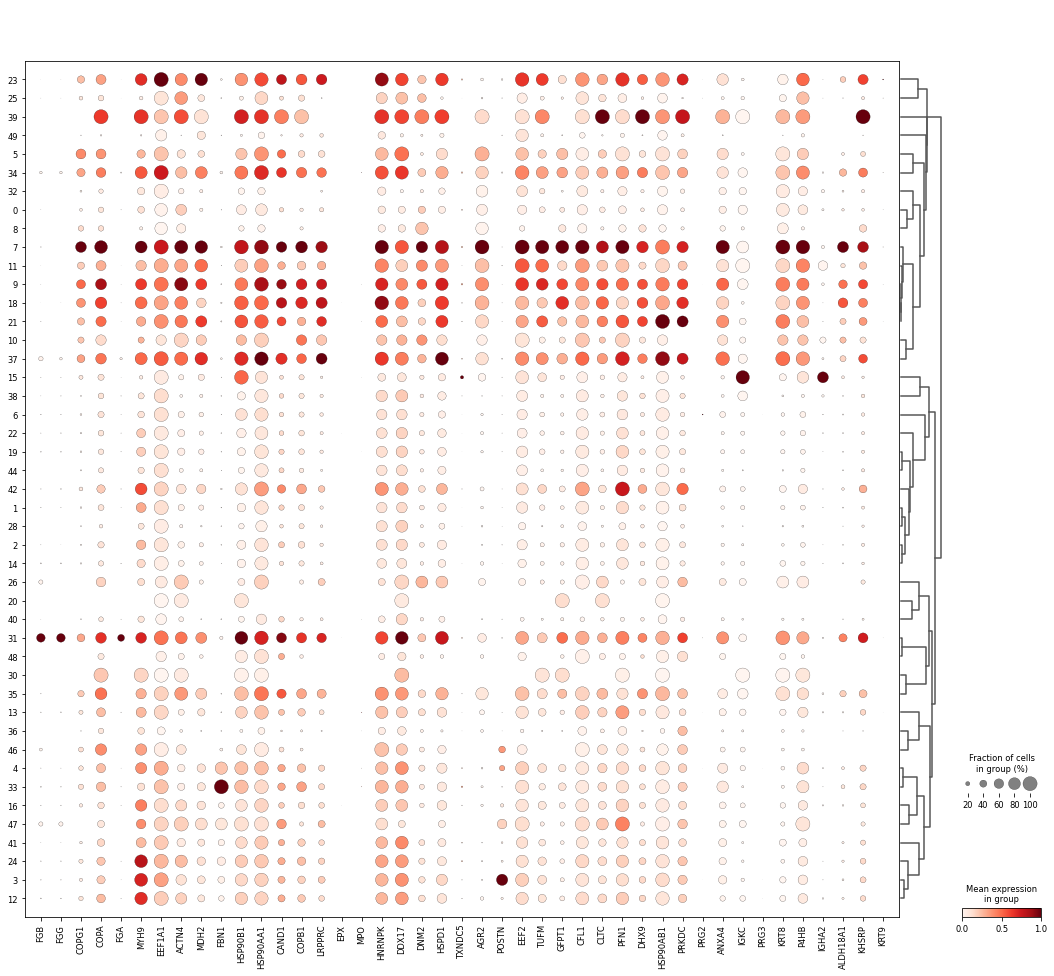

In [15]:
# Upregulated in tumor
sc.pl.dotplot(adata_10x, var_names=df_NE_vs_T.query('log2fc>0')['gene'].values, 
              groupby='nobatch_leiden', standard_scale='var', dendrogram=True)

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


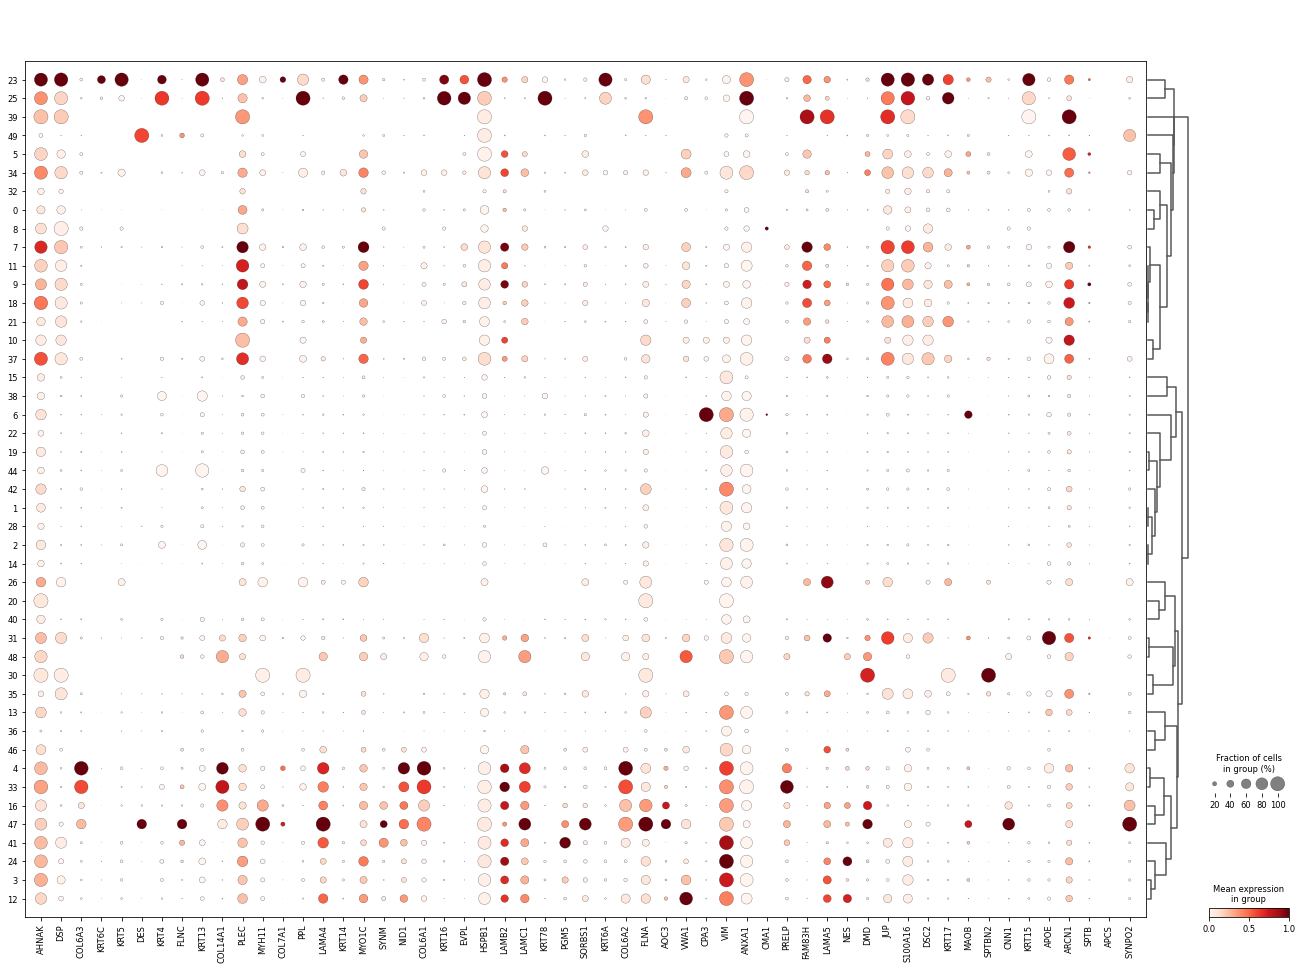

In [16]:
# Down in tumor
sc.pl.dotplot(adata_10x, var_names=df_NE_vs_T.query('log2fc<0')['gene'].values, groupby='nobatch_leiden', standard_scale='var', dendrogram=True)

## Expression by scRNAseq cell type
Which cell types (as opposed to the finer leiden clusters) are those 98 expressed
### Grouping by celltype

annotating an fixing some cell types

In [14]:
adata_10x.obs['celltype_split'] = annotate_coarse_celltype(adata_10x, 'leiden')

adata_10x.obs.loc[adata_10x.obs.leiden.isin(['17', '18','20']),'celltype_split']= 'Squamous Epithelium'
adata_10x.obs.loc[adata_10x.obs.leiden.isin(['13']),'celltype_split']= 'Myofibroblasts'
adata_10x.obs.loc[adata_10x.obs.leiden.isin(['19']),'celltype_split']= 'Neutrophils'

# rename to columnar wpithelum
adata_10x.obs['celltype_split'] = adata_10x.obs['celltype_split'].replace({'Epithelial cells': 'Columnar Epithelium'})

adata_10x.obs['celltype_split'] = pd.Categorical(adata_10x.obs['celltype_split'])


# epi/stroma/immune
adata_10x.obs['tissue_split'] = annotate_epi_stroma_immune(adata_10x, 'leiden')

In [19]:
from sctools.scplotting import recolor

# some adjustment to colors (mostly naming of cell types
color_dict_coarse_celltype['Squamous Epithelium']= color_dict_CellLabels['gi_epithelial']
color_dict_coarse_celltype['Columnar Epithelium']= color_dict_CellLabels['squamous_epithelial']
color_dict_coarse_celltype['Neutrophils']= color_dict_CellLabels['neutrophils']
color_dict_coarse_celltype['Myofibroblasts']= color_dict_CellLabels['myofibroblasts']
recolor(adata_10x, 'celltype_split', color_dict_coarse_celltype)

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'tissue_split' as categorical


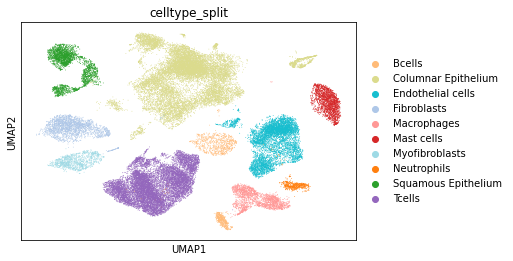

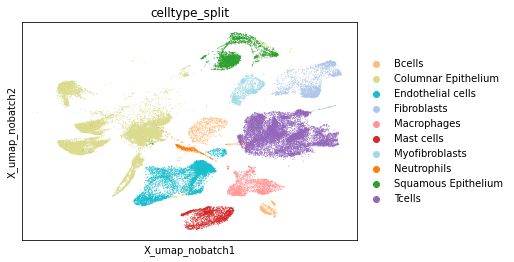

In [20]:
sc.pl.umap(adata_10x, color='celltype_split')
sc.pl.embedding(adata_10x, basis='X_umap_nobatch', color='celltype_split')

### Down in tumor

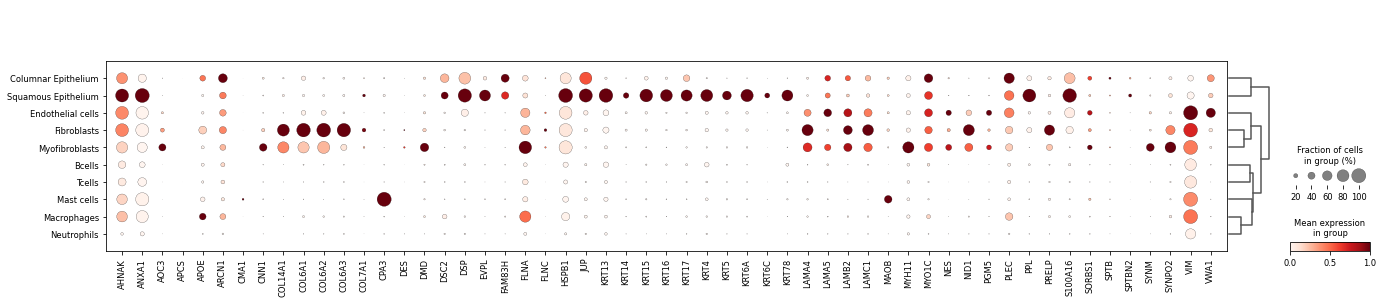

In [21]:
down_in_tumor_genes = sorted(df_NE_vs_T.query('log2fc<0')['gene'].values)
sc.pl.dotplot(adata_10x, var_names=down_in_tumor_genes, groupby='celltype_split', standard_scale='var', dendrogram=True, show=False)
plt.savefig(f'{plotfolder}/ECM_singlecellsource_downreg.svg')

### Up in tumor

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


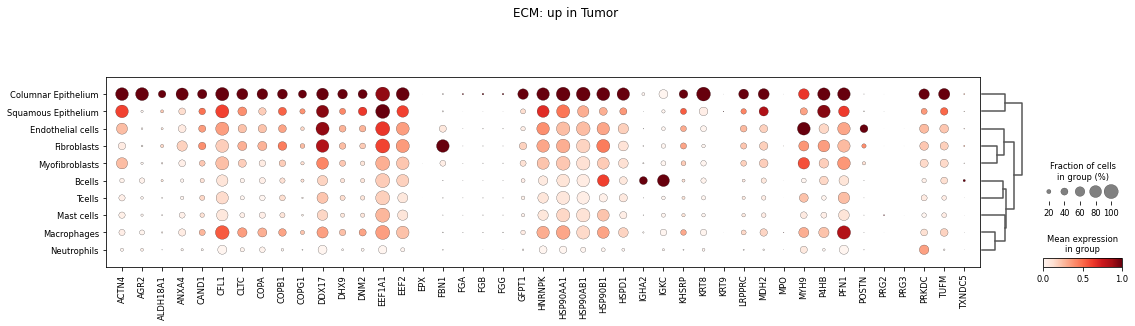

In [22]:
up_in_tumor_genes = sorted(df_NE_vs_T.query('log2fc>0')['gene'].values)
sc.pl.dotplot(adata_10x, var_names=up_in_tumor_genes, groupby='celltype_split', standard_scale='var', dendrogram=True, title='ECM: up in Tumor', show=False)
plt.savefig(f'{plotfolder}/ECM_singlecellsource_upreg.svg')

# General fold change in proteomics vs scrnaseq 
independent of cell type etc

In [26]:
adata_bulk_de = groupby_rows(adata_10x, groupby_field='samplename', aggr_fun=lambda x: np.sum(x, axis=0))
adata_bulk_de.obs = adata_bulk_de.obs.merge(df_meta, on='samplename').set_index('samplename')
adata_bulk_de.raw  = adata_bulk_de

100%|██████████| 12/12 [00:00<00:00, 22.56it/s]


In [27]:
def fold_change_pseudobulk(adata_bulk_de, gene_list):
    sequencing_depth_per_sample = adata_bulk_de.raw.X.sum(1)
    _new_df = []
    for genename in tqdm.tqdm(gene_list):
        
        if not genename in adata_bulk_de.var_names:
            print(f'{genename} not in scRNAseq. skipping')
            continue
        _df = adata_bulk_de.obs.copy()
        _df['gene'] = adata_bulk_de.raw[:,genename].X
        _df['gene_normalized'] = 1e7 *_df['gene'] / sequencing_depth_per_sample
        _df['diagnosis'] = _df['diagnosis'].astype(str)

        expr_field = 'gene'
        expr_field = 'gene_normalized'
        NE_expression = _df.query('diagnosis=="NE"')[expr_field].mean()
        T_expression = _df.query('diagnosis=="T"')[expr_field].mean()
        delta_expression =  T_expression - NE_expression
        ratio_expression =  (1+T_expression) / (1+NE_expression)

        _t = {
            'delta_expression_scrnaseq': delta_expression, 
            "NE_expression_scrnaseq":NE_expression, 
            "T_expression_scrnaseq":T_expression ,
            'ratio_scrnaseq': ratio_expression,
            'gene': genename
        }

        _new_df.append(_t)
    _new_df = pd.DataFrame(_new_df)
    _new_df= _new_df.reset_index()
    return _new_df

In [28]:
_FC_pseudobulk_df =  fold_change_pseudobulk(adata_bulk_de, gene_list=down_in_tumor_genes+up_in_tumor_genes)

100%|██████████| 98/98 [00:00<00:00, 145.78it/s]


/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//ECM_FC_comparison.svg


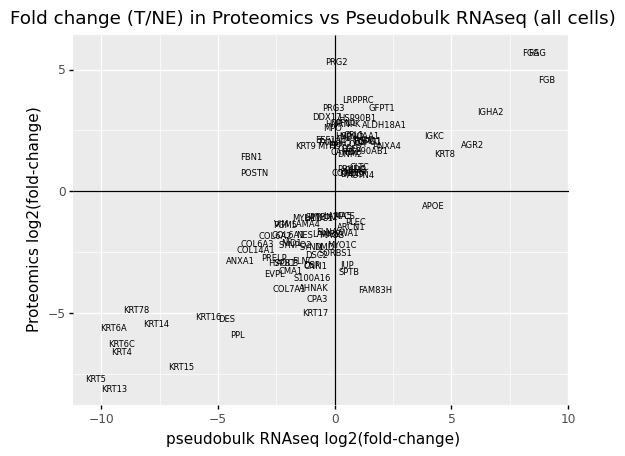

<ggplot: (8772603898017)>

In [29]:
df_FC_sc_proteomics = _FC_pseudobulk_df.merge(df_NE_vs_T.rename({'log2fc': 'log2fc_proteomics', 'qvalue': 'qvalue_proteomics'}, axis=1), on='gene')
p = pn.ggplot(df_FC_sc_proteomics,
          pn.aes('np.log2(ratio_scrnaseq)', 'log2fc_proteomics', label='gene' ))\
+ pn.geom_text(size=6) + pn.geom_vline(xintercept=0) + pn.geom_hline(yintercept=0)\
+ pn.labs(title='Fold change (T/NE) in Proteomics vs Pseudobulk RNAseq (all cells)', x='pseudobulk RNAseq log2(fold-change)', y='Proteomics log2(fold-change)')
p.save(f'{plotfolder}/ECM_FC_comparison.svg')
p

In [30]:
from scipy.stats import spearmanr
spearmanr(
    np.log2(df_FC_sc_proteomics.ratio_scrnaseq),
    df_FC_sc_proteomics.log2fc_proteomics)

SpearmanrResult(correlation=0.7337777228233605, pvalue=8.390790952375747e-18)

# scRNAseq fold change per cell type
to see how those FCs are related to cell types

In [31]:
def suis_plot(gene_list, splitby='celltype_split'):
    _new_df = []
    import tqdm
    sequencing_depth = adata_10x.obs.groupby('samplename').n_molecules.sum()
    sequencing_depth_per_cell = sequencing_depth[adata_10x.obs.samplename]
    for genename in tqdm.tqdm(gene_list):
        _df = adata_10x.obs.copy()
        _df['gene'] = adata_10x.raw[:,genename].X.A
        _df['gene_normalized'] = 1e7 *_df['gene'] / sequencing_depth_per_cell.values
        _df['diagnosis'] = _df['diagnosis'].astype(str)
        _df = _df.query('celltype_split!="Other"')
        
        expr_field = 'gene'
        expr_field = 'gene_normalized'
        NE_expression = _df.query('diagnosis=="NE"').groupby(splitby)[expr_field].mean()
        T_expression = _df.query('diagnosis=="T"').groupby(splitby)[expr_field].mean()
        delta_expression =  T_expression - NE_expression
        T_ncells = _df.query('diagnosis=="T"').groupby(splitby).size()
        NE_ncells = _df.query('diagnosis=="NE"').groupby(splitby).size()
        ratio_expression =  (1+T_expression) / (1+NE_expression)

        _t = pd.DataFrame({'delta_expression': delta_expression, 
                           "NE_expression":NE_expression, 
                           "T_expression":T_expression ,
                           "T_ncells":T_ncells, 
                           "NE_ncells": NE_ncells,
                           'ratio': ratio_expression})
        _t['gene'] = genename

        _new_df.append(_t)
    _new_df = pd.concat(_new_df)
    _new_df= _new_df.reset_index()
    
    return _new_df

In [32]:
_new_df = suis_plot(down_in_tumor_genes)
_new_df['delta_expression_trim'] = _new_df['delta_expression'].apply(lambda x: np.clip(x, -20,20))
_new_df['min_cells'] =  _new_df.apply(lambda row: np.minimum(row['NE_ncells'], row['T_ncells']), axis=1)
_new_df['ratio_cells'] =  _new_df.apply(lambda row:  (1+row['T_ncells'])/(1+row['NE_ncells']), axis=1)
_new_df['celltype_split'] = pd.Categorical(_new_df['celltype_split'], celltype_order_coarse_celltype)

100%|██████████| 55/55 [00:28<00:00,  1.94it/s]


In [33]:
_up_df = suis_plot(up_in_tumor_genes)
_up_df['delta_expression_trim'] = _up_df['delta_expression'].apply(lambda x: np.clip(x, -20,20))
_up_df['min_cells'] =  _up_df.apply(lambda row: np.minimum(row['NE_ncells'], row['T_ncells']), axis=1)
_up_df['ratio_cells'] =  _up_df.apply(lambda row:  (1+row['T_ncells'])/(1+row['NE_ncells']), axis=1)
_up_df['celltype_split'] = pd.Categorical(_up_df['celltype_split'], celltype_order_coarse_celltype)

100%|██████████| 43/43 [00:22<00:00,  1.93it/s]


In [34]:
# colormap = pn.scale_color_brewer(type='qual', palette="Paired", name='Cell type') 
colormap = pn.scale_color_manual(color_dict_coarse_celltype)
theme =  pn.theme(figure_size=(3,9), panel_background=pn.element_rect(fill='white', alpha=.2), line=pn.element_line(color='grey'))

In [36]:
_new_df

,celltype_split,delta_expression,NE_expression,T_expression,T_ncells,NE_ncells,ratio,gene,delta_expression_trim,min_cells,ratio_cells
0,Bcells,-0.143803,0.347376,0.203573,827,444,0.893272,AHNAK,-0.143803,444,1.860674
1,Columnar Epithelium,-1.516229,2.544718,1.028489,14956,243,0.572257,AHNAK,-1.516229,243,61.299180
2,Endothelial cells,-0.713670,1.406674,0.693004,1386,4709,0.703462,AHNAK,-0.713670,1386,0.294480
3,Fibroblasts,-1.512744,2.202754,0.690010,448,1910,0.527674,AHNAK,-1.512744,448,0.234956
4,Macrophages,-3.383581,3.913254,0.529674,1860,387,0.311336,AHNAK,-3.383581,387,4.796392
...,...,...,...,...,...,...,...,...,...,...,...
545,Mast cells,-0.001086,0.003140,0.002054,1053,1042,0.998918,VWA1,-0.001086,1042,1.010547
546,Myofibroblasts,0.016249,0.016420,0.032669,516,605,1.015987,VWA1,0.016249,516,0.853135
547,Neutrophils,0.036836,0.000446,0.037282,195,394,1.036819,VWA1,0.036836,195,0.496203
548,Squamous Epithelium,0.122178,0.103035,0.225213,62,2908,1.110765,VWA1,0.122178,62,0.021657


/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 3 x 9 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//ECM_FC_comparison_per_celltype_down.svg


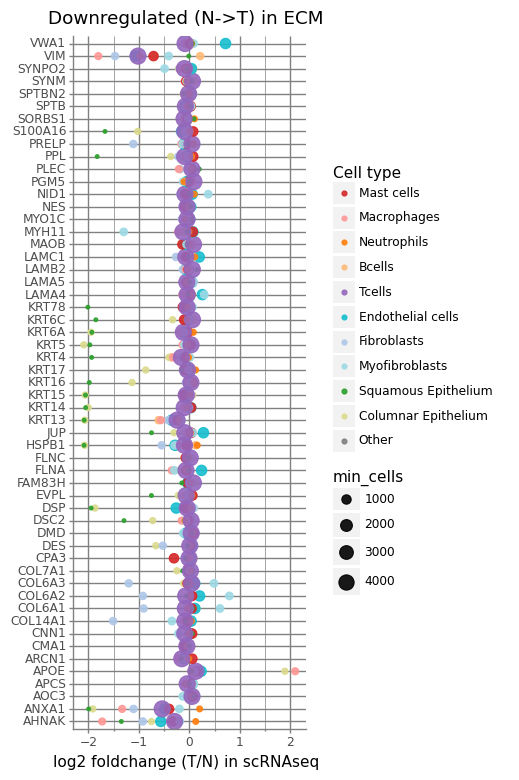

<ggplot: (8772605846005)>

In [38]:
p = pn.ggplot(_new_df.merge(df_NE_vs_T, on='gene').rename({'celltype_split': 'Cell type'}, axis=1),   #'np.log10(min_cells)')
          pn.aes(y='gene', x='np.clip(np.log2(ratio), -2,2)', color='Cell type',size='min_cells')) \
+ pn.geom_jitter(alpha=0.9,height=0, width=0.1 ) + colormap\
+ pn.labs(x='log2 foldchange (T/N) in scRNAseq', title='Downregulated (N->T) in ECM', y='') \
+ theme
p.save(f'{plotfolder}/ECM_FC_comparison_per_celltype_down.svg')
p

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 3 x 9 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//ECM_FC_comparison_per_celltype_up.svg


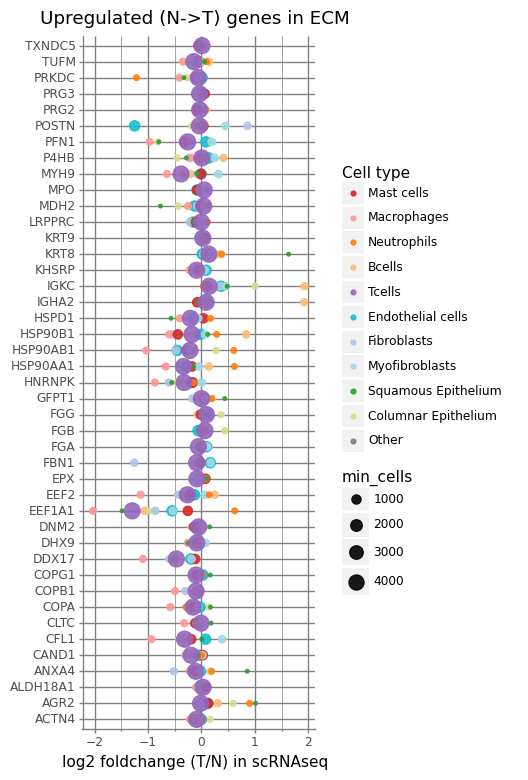

<ggplot: (8772843134881)>

In [41]:
p= pn.ggplot(_up_df.rename({'celltype_split': 'Cell type'}, axis=1), pn.aes(y='gene', x='np.clip(np.log2(ratio), -2,2)', color='Cell type', size='min_cells')) \
+ pn.geom_jitter(alpha=0.9,height=0, width=0.1 ) + colormap + pn.labs(x='log2 foldchange (T/N) in scRNAseq', title='Upregulated (N->T) genes in ECM', y='') \
+theme
p.save(f'{plotfolder}/ECM_FC_comparison_per_celltype_up.svg')
p

# Boxplots of genes

In [15]:
from crukiopy_release.colormaps import color_dict_diagnosis, color_dict_coarse_celltype, celltype_order_coarse_celltype, color_dict_CellLabels
pn_diag_cmap =  pn.scale_color_manual(color_dict_diagnosis)
pn_diag_cmap2 =  pn.scale_fill_manual(color_dict_diagnosis)
def plot_de(genename):
    """plot, split by diagnosis and celltype"""
    _df = adata_10x.obs.copy()
    _df['gene'] = adata_10x.raw[:,genename].X.A
    _df['diagnosis'] = _df['diagnosis'].astype(str)
    _df = _df.query('celltype_split!="Other"')

    # pn.ggplot(_df, pn.aes(x='celltype_split', y='np.log10(1+gene)', color='diagnosis')) + pn.geom_jitter() \
    p = pn.ggplot(_df, pn.aes(x='diagnosis', y='np.log10(1+gene)', color='diagnosis'))\
    + pn.geom_boxplot(color='black', outlier_size=0, outlier_alpha=0) + pn.geom_jitter(alpha=0.3, size=0.1, height=0)  \
    + pn.facet_grid('~celltype_split')\
    + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1), figure_size=(15,2)) + pn.labs(y=f'log10(1+{genename})') + pn_diag_cmap + pn_diag_cmap2
    return p


def plot_de_patient(genename):
    """plot, split by diagnosis and celltype"""
    _df = adata_10x.obs.copy()
    _df['gene'] = adata_10x.raw[:,genename].X.A
    _df['diagnosis'] = _df['diagnosis'].astype(str)
    _df = _df.query('celltype_split!="Other"')

    # pn.ggplot(_df, pn.aes(x='celltype_split', y='np.log10(1+gene)', color='diagnosis')) + pn.geom_jitter() \
    p = pn.ggplot(_df, pn.aes(x='diagnosis', y='np.log10(1+gene)', color='diagnosis'))\
    + pn.geom_boxplot(color='black', outlier_size=0, outlier_alpha=0) + pn.geom_jitter(alpha=0.3, size=0.1, height=0)  \
    + pn.facet_grid('patient~celltype_split')\
    + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1), figure_size=(15,2)) + pn.labs(y=f'log10(1+{genename})') + pn_diag_cmap + pn_diag_cmap2
    return p



def plot_de_all(genenames):
    """
    plot multiple genes, split by diagnosis and celltype
    each gene gets its own row
    """
    _df = adata_10x.obs.copy()
    _df['diagnosis'] = _df['diagnosis'].astype(str)
    _df_all_genes = []
    for g in genenames:
        _tmp = _df.copy()
        _tmp['expression'] = adata_10x.raw[:,g].X.A
        _tmp['gene'] = g
        _df_all_genes.append(_tmp)
    _df_all_genes = pd.concat(_df_all_genes)
    _df = _df.query('celltype_split!="Other"')

    # pn.ggplot(_df, pn.aes(x='celltype_split', y='np.log10(1+gene)', color='diagnosis')) + pn.geom_jitter() \
    p = pn.ggplot(_df_all_genes, pn.aes(x='diagnosis', y='np.log10(1+expression)', color='diagnosis', fill='diagnosis'))\
    + pn.geom_boxplot(color='black', outlier_size=0, outlier_alpha=0) \
    + pn.facet_grid('celltype_split~gene', scales='free') + pn_diag_cmap + pn_diag_cmap2\
    + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1)) + pn.labs(y=f'log10(1+expression)')
#     + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1), figure_size=(15,2)) #+ pn.labs(y=f'log10({genename})')
#  
# + pn.geom_jitter(alpha=0.3, size=0.1) 

    return p


def plot_de_all_for_celltype(genenames, celltype):
    """
    plot multiple genes, split by diagnosis and celltype
    each gene gets its own row
    """
    
    
    _df = adata_10x.obs.copy()
    _df['diagnosis'] = _df['diagnosis'].astype(str)
    _df_all_genes = []
    for g in genenames:
        _tmp = _df.copy()
        _tmp['expression'] = adata_10x.raw[:,g].X.A
        _tmp['gene'] = g
        _df_all_genes.append(_tmp)
    _df_all_genes = pd.concat(_df_all_genes)
    _df_all_genes = _df_all_genes.query('celltype_split==@celltype')

#     import pdb
#     pdb.set_trace()
    # pn.ggplot(_df, pn.aes(x='celltype_split', y='np.log10(1+gene)', color='diagnosis')) + pn.geom_jitter() \
    p = pn.ggplot(_df_all_genes, 
                  pn.aes(x='diagnosis', y='np.log10(1+expression)', color='diagnosis', fill='diagnosis'))\
    + pn.geom_boxplot(color='black', outlier_size=0, outlier_alpha=0) + pn.geom_jitter(alpha=0.3, size=0.1, height=0)  \
    + pn.facet_wrap('~gene', scales='free_y', ncol=15) + pn_diag_cmap + pn_diag_cmap2\
    + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1)) + pn.labs(y=f'log10(1+expression)')
#     + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1), figure_size=(15,2)) #+ pn.labs(y=f'log10({genename})')
#  
    return p

## All genes into one plot
- split by celltype, diagnosis

In [105]:
q = plot_de_all(down_in_tumor_genes) + pn.theme(figure_size=(len(down_in_tumor_genes)*1, 15))
q.save(f'{plotfolder}/boxplots_downreg.png', limitsize=False)

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 55 x 15 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//boxplots_downreg.png


In [103]:
# q.save('/tmp/down.svg', limitsize=False)  # HUGE!

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 55 x 15 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/down.svg


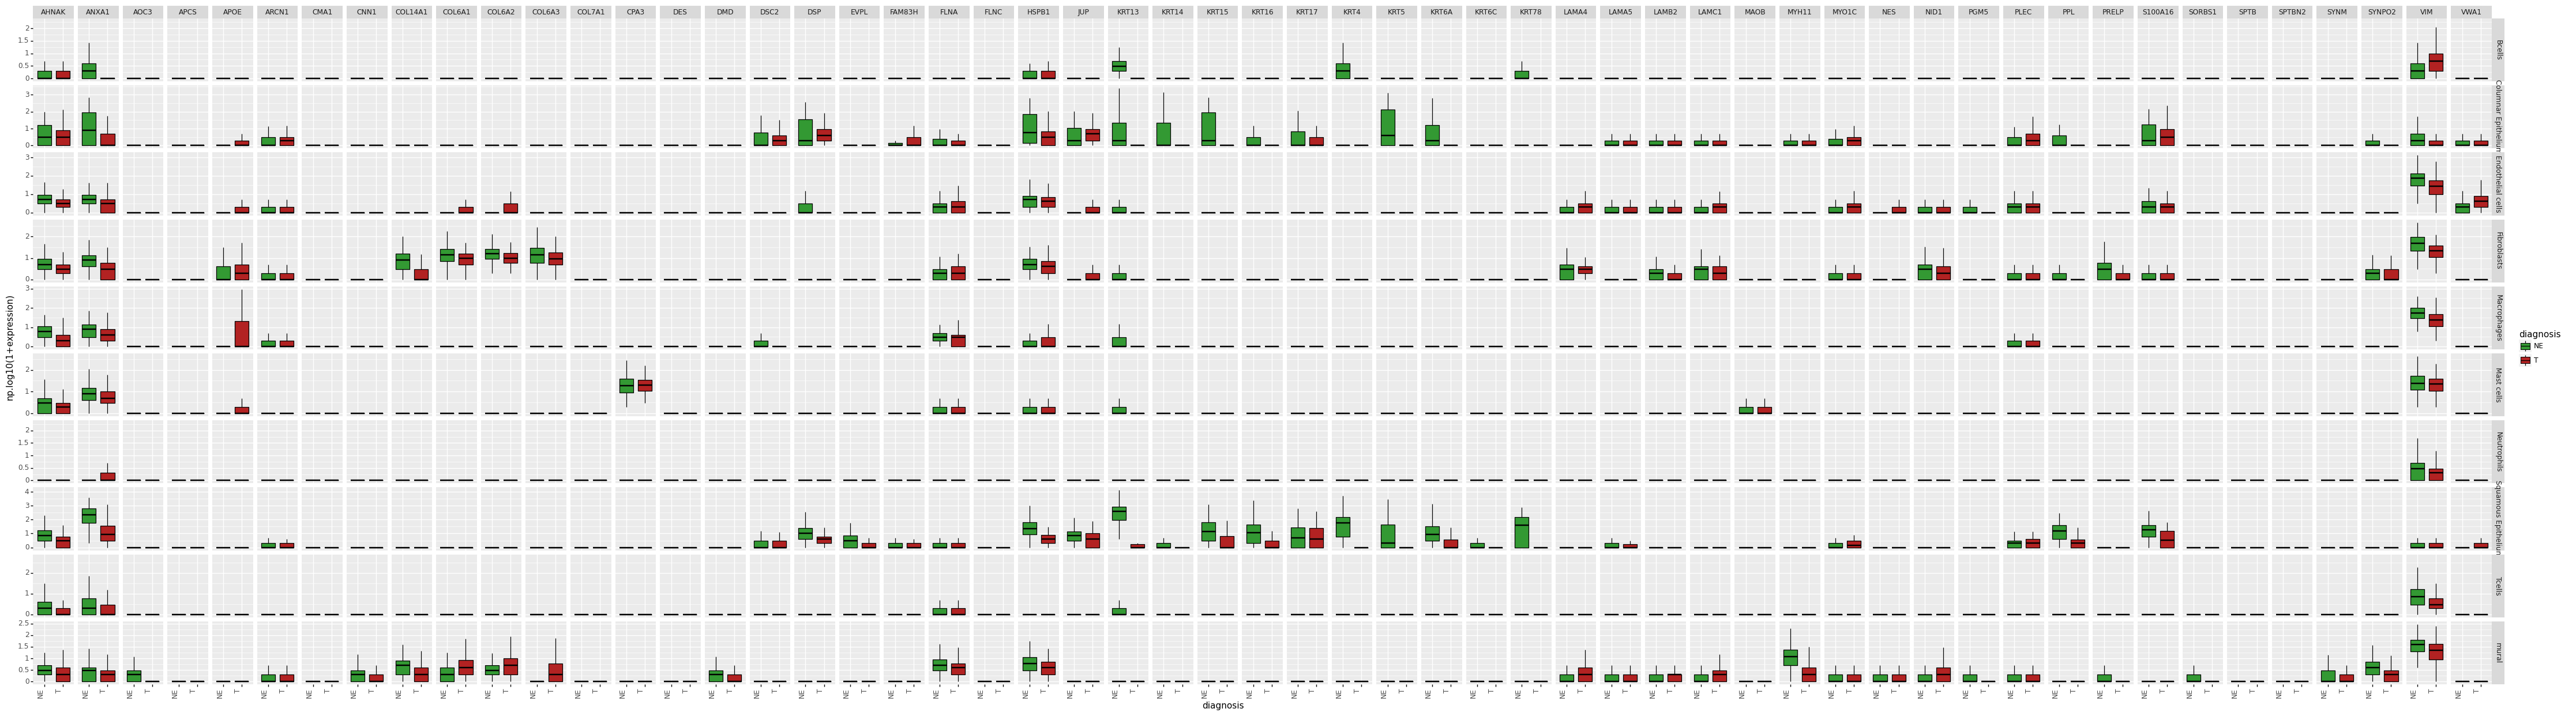

<ggplot: (8730462294253)>

In [102]:
q

In [106]:
q = plot_de_all(up_in_tumor_genes) + pn.theme(figure_size=(len(up_in_tumor_genes)*1, 15))
q.save(f'{plotfolder}/boxplots_upreg.png', limitsize=False)

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 43 x 15 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//boxplots_upreg.png


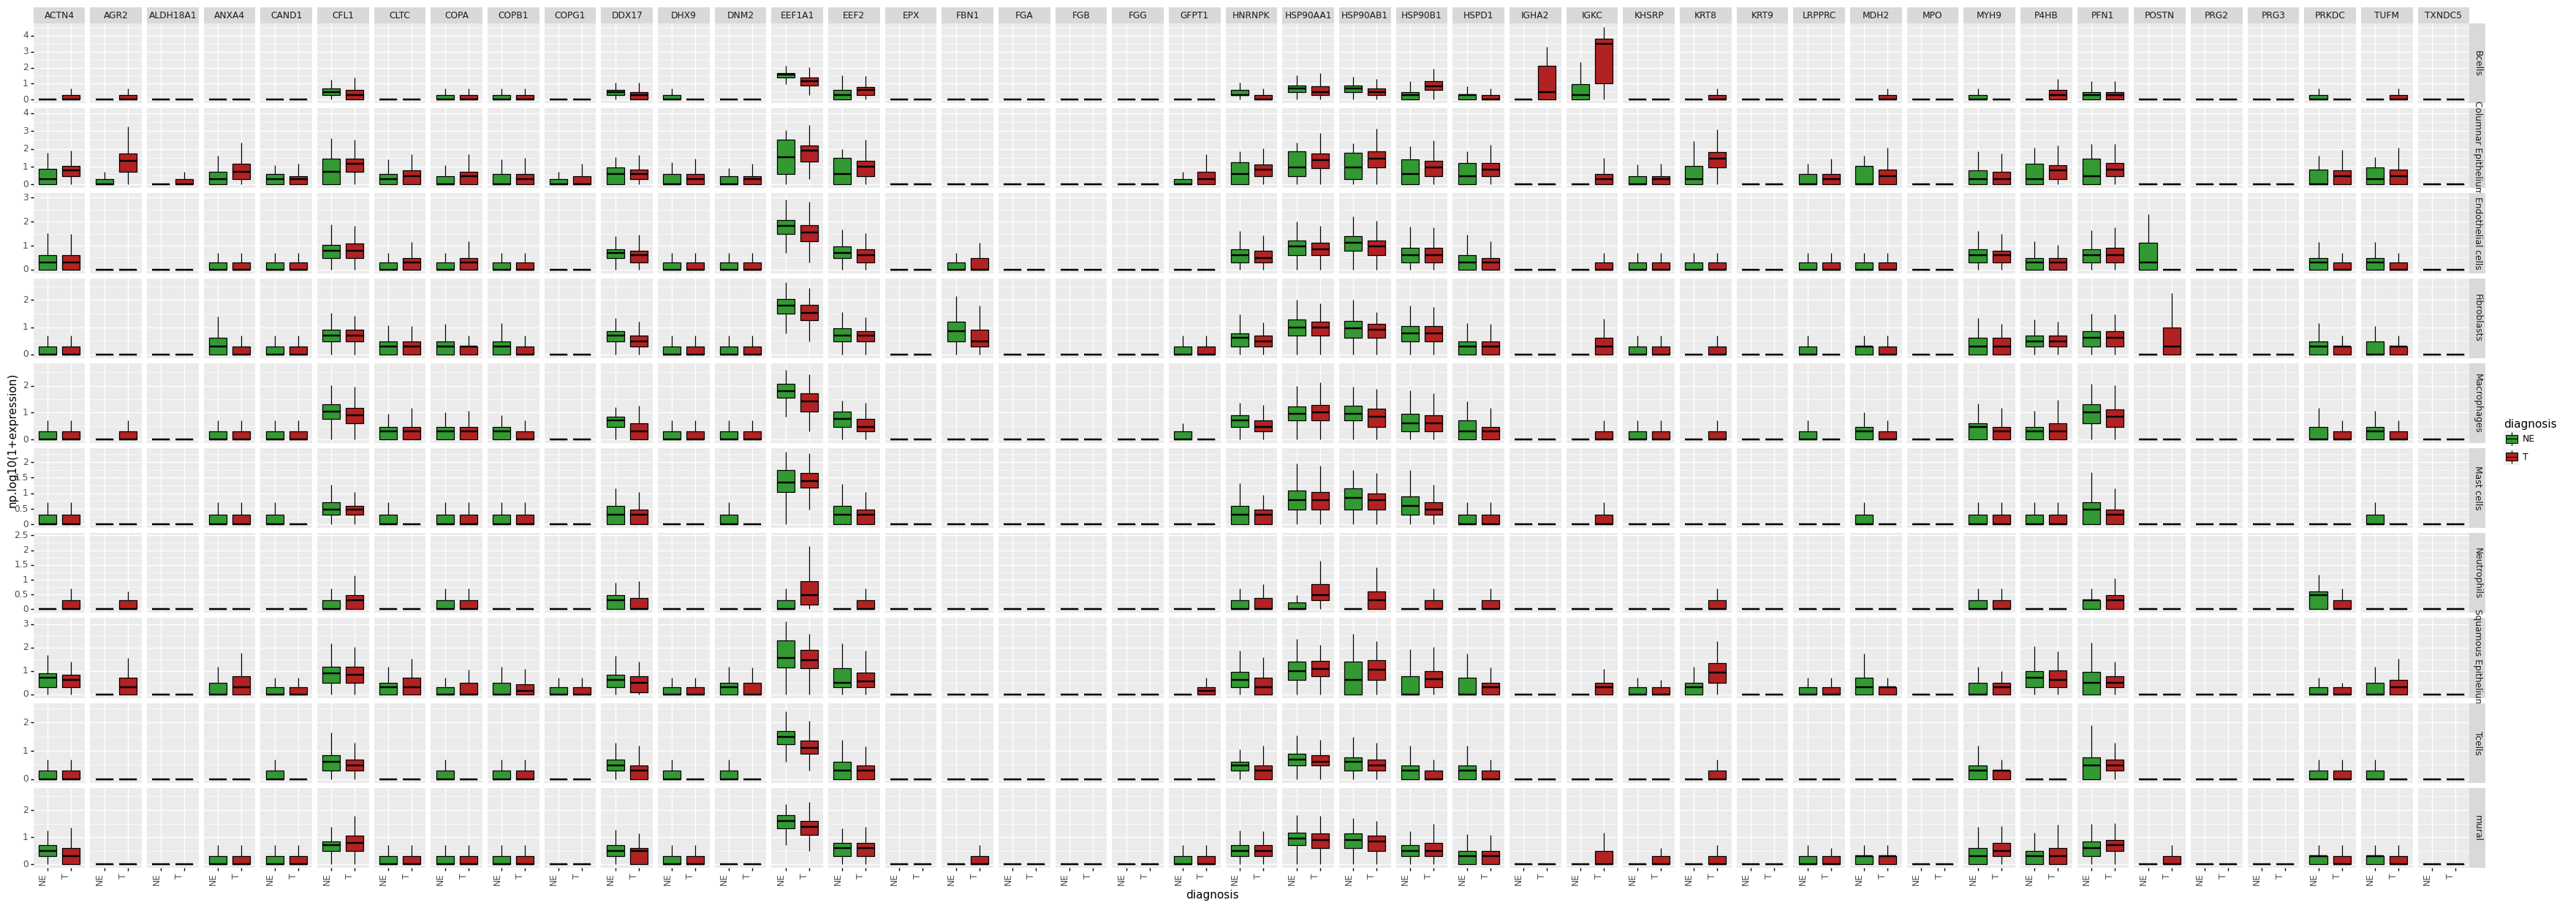

<ggplot: (8730441319897)>

In [107]:
q

## one plot per celltype
- split by diagnosis

In [108]:
(15,int(len(down_in_tumor_genes)/5))

(15, 11)

In [113]:
heigh = 15
width = 10
for celltype in adata_10x.obs.celltype_split.unique():
    p= plot_de_all_for_celltype(up_in_tumor_genes, celltype) + pn.labs(title=celltype)  +pn.theme(figure_size=(heigh, width)) 
    p.save(f'{plotfolder}/ECM_up_{celltype}.png')

    p= plot_de_all_for_celltype(down_in_tumor_genes, celltype) + pn.labs(title=celltype)  +pn.theme(figure_size=(heigh, width)) 
    p.save(f'{plotfolder}/ECM_down_{celltype}.png')

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 10 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//ECM_up_Macrophages.png
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 10 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//ECM_down_Macrophages.png
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'

## one plot per gene

In [ ]:
if not os.path.exists(f'{plotfolder}/gene_boxplots'):
    os.mkdir(f'{plotfolder}/gene_boxplots')
for gene in df_NE_vs_T.gene:
    p = plot_de(gene)
    p.save(f'{plotfolder}/gene_boxplots/{gene}.png')

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 2 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//gene_boxplots/AHNAK.png
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 2 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/ECM//gene_boxplots/DSP.png
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Sav

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


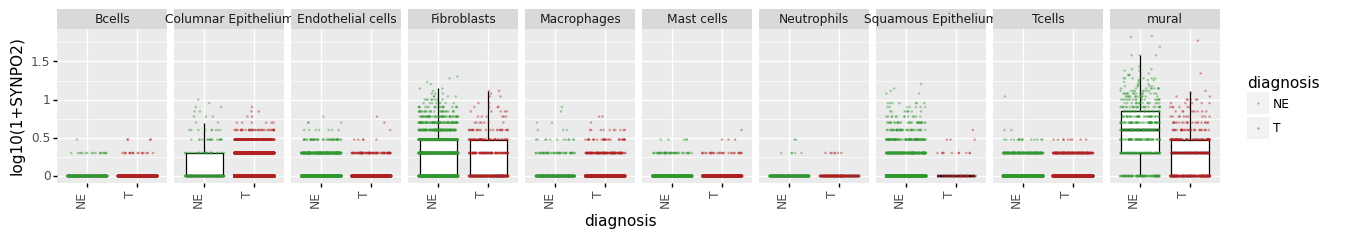

<ggplot: (8774980373337)>

In [60]:
p

# PLotting a few genes

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


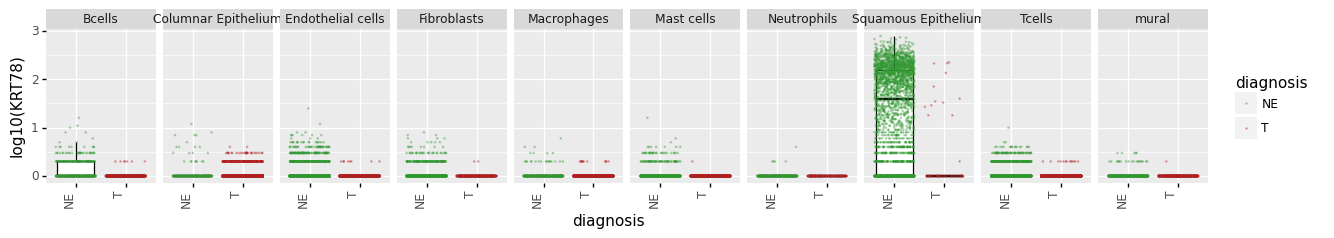

<ggplot: (8730365377361)>

In [112]:
plot_de('KRT78')

In [18]:
p = plot_de('POSTN')
p.save('/tmp/POSTN.svg')

/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 2 in image.
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /tmp/POSTN.svg
/home/mstrasse/miniconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


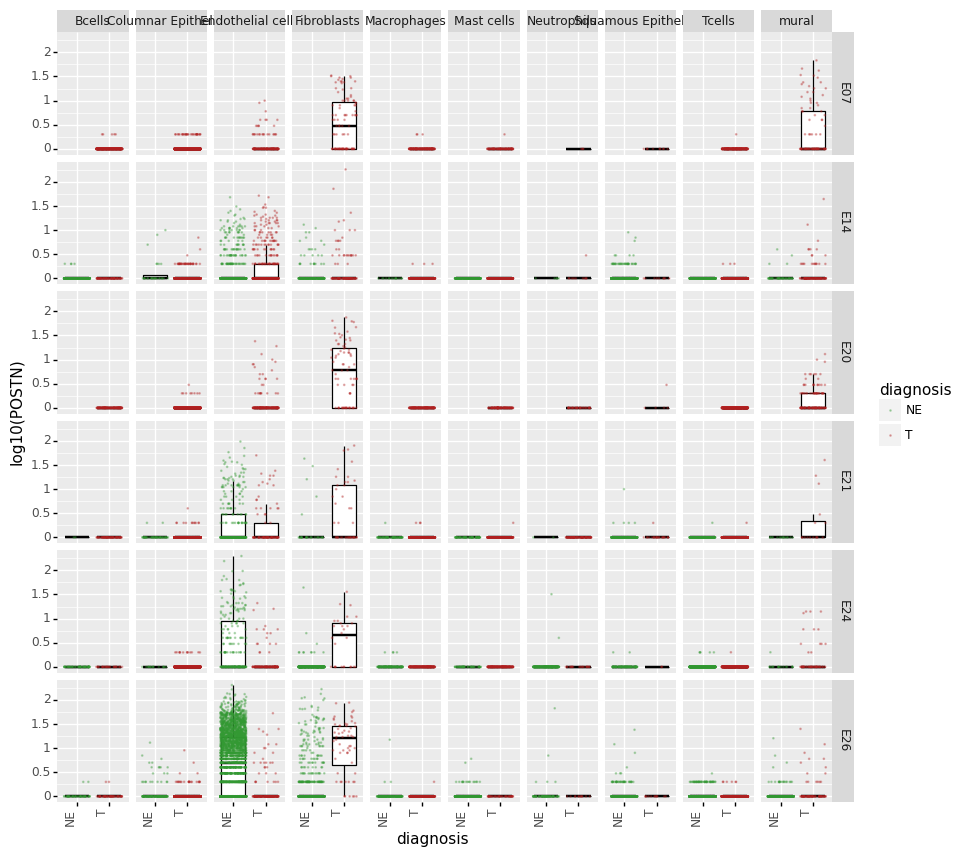

<ggplot: (8764962902965)>

In [167]:
plot_de_patient('POSTN') + pn.theme(figure_size=(10,10))